## 6: Task (Partial notebook)

The government employed an external consultant to assist with data analysis. However, the consultant resigned and left the project in a half-completed state. The government provided you with the partially completed Jupyter Notebook that was developed by the consultant. They asked you to evaluate and complete the Jupyter Notebook with Python code.

This activity will consist of two parts: (1) demonstrate the use of the functions provided, and (2) answer additional questions posed by the government. The questions are:

- What is the difference between qualitative and quantitative data? How can these be used in business predictions?
- Why is continuous improvement required? Can we not just implement the project and move on to other pressing matters?
- As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. Does that mean we can ignore data ethics?

In [1]:
# Libraries and settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load and select relevant subset of the data.
# Make sure to change the relative path to function in your environment.
ds1 = pd.read_csv('covid_19_uk_cases.csv')
ds2 = pd.read_csv('covid_19_uk_vaccinated.csv')

sample = ds1[['Province/State','Date','Hospitalised']]

In [3]:
# Select data for a specific province
sample_ci = sample[sample['Province/State'] == "Channel Islands"]

In [4]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above. 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe.
    plt.plot(series[window:], label='Actual values')
    plt.grid(True)

In [5]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

### Question 1:

The consultant indicated that the function is functional, but did not demonstrate how to use it. Use the provided function, `plot_moving_average()`, to plot the data for the selected province (variable name is `sample_ci` and set the window parameter to 7 days. 

/var/folders/v9/nmvplk2d3bqcy3zt2hb6mq8r0000gn/T/ipykernel_67224/3520242192.py:5: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date', 'Province/State'], dtype='object')
  rolling_mean = series.rolling(window=window).mean()


TypeError: unhashable type: 'numpy.ndarray'

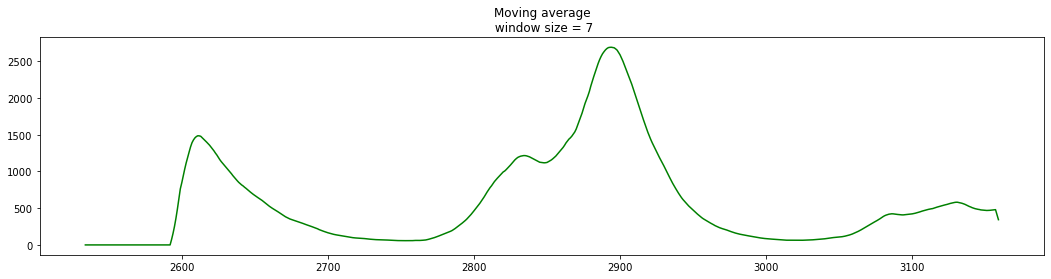

In [7]:
# Demonstrate the use of the function to plot moving averages

plot_moving_average(sample_ci, 7,plot_intervals=False)

/var/folders/v9/nmvplk2d3bqcy3zt2hb6mq8r0000gn/T/ipykernel_67224/3520242192.py:5: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date', 'Province/State'], dtype='object')
  rolling_mean = series.rolling(window=window).mean()


TypeError: unhashable type: 'numpy.ndarray'

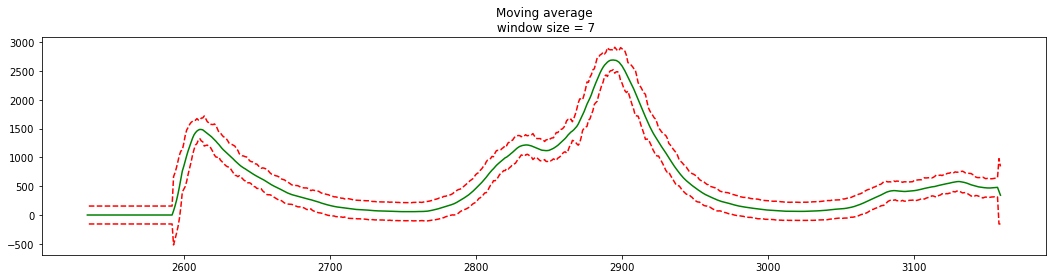

In [8]:
plot_moving_average(sample_ci, 7,plot_intervals=True)

In [9]:
print(mean_absolute_error(1,4))

3


### Question 2:

The consultant performed a calculation that looks interesting, but the team is unsure about what the intention was and how to interpret the output. Can you offer some insights into the meaning of the code and output in the cell below? Is it useful?

This i

In [10]:
# Return top three days with biggest difference between daily value and rolling 7-day mean
s = sample_ci.copy()
s_rolling = s['Hospitalised'].rolling(window=7).mean()
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])
s.sort_values('error', ascending=False).head(3)

,Province/State,Date,Hospitalised,error
2593,Channel Islands,2020-03-27,509.0,436.285714
2594,Channel Islands,2020-03-28,579.0,423.571429
2595,Channel Islands,2020-03-29,667.0,416.285714


### Question 3:

The management team had some additional questions around the project where they asked for additional feedback to be included in your final presentation. Make sure to answer the questions in the notebook in markdown format in preparation for your presentation. They expectation is that you will provide short and direct responses to help them understand the importance and impact of the questions below.

> ***Note:*** You can double-click on the markdown cells to edit the text.

#### Question 3.1 (double click cell to edit)
- What is the difference between qualitative and quantitative data and how can this be used in predictions?

Below quanitative and qualitative data is explained:
Quantitative data refers to any information that can be quantified. If it can be counted or measured, and given a numerical value, it’s quantitative data. Quantitative data can tell you “how many,” “how much,” or “how often”—for example, how many people attended last week’s webinar? How much revenue did the company make in 2019?
Qualitative data is defined as the data that approximates and characterizes. Qualitative data can be observed and recorded. This data type is non-numerical in nature. Qualitative data cannot be measured or counted. It’s descriptive!

How its used in predictions:
Generally, qualitative analysis is used by market researchers and statisticians to understand behaviors. For business, it’s commonly used by data analysts to understand and interpret customer and user behavior. 
Quantitative data makes measuring various parameters controllable due to the ease of mathematical derivations they come with. Quantitative data is usually collected for statistical analysis actions.

#### Question 3.2 (double click cell to edit)
- Can you provide your observations around why continuous improvement is required, can we not just implement the project and move on to other pressing matters?

It’s important to know the cost of completing a body of work. For this reason, most project management offices benefit from knowing the amount of time it takes to get certain types of work done. Project managers can reduce project cost and prevent overages using Forecasting Software. Forecasting (versus estimating) whether a project’s constraints are likely to be broken is one way in which project management offices can increase their overall effectiveness for the company.

Working to constantly improve is the number one way in which many businesses reduce operating overhead. Continuous improvement (sometimes known as “rapid improvement”) is a Lean improvement technique that helps to streamline workflows. The Lean way of working enables efficient workflows that save time and money, allowing you to reduce wasted time and effort. For example, projects that involve shifting deadlines, changing priorities and other complexities are usually filled with opportunities to improve. It’s just that no one has acted on that opportunity.

#### Question 3.2 (double click cell to edit)
- We adhere to all data protection requirements and have good governance in place. Does that mean we can ignore data ethics. We only work with aggregated data and therefore will not expose any personal details? (is it different, example of how it could apply to this case; two or three sentences max)

Not at all! We are adhere to all data protection does not mean we are ignoring the data ethics. Data governance is the practice of knowing where your data is, how it's being utilized, and whether or not it’s adequately protected. Good data governance ensures that data has integrity, is consistent, and is not being misused or mishandled. It is always, not only within data science, important to keep ethics in mind to both not get into legal trouble but most importantly to not missuse anything and be a good "ethical" citizen.